
# Physicochemical Properties of Protein Tertiary Structure/ Machine Learning algorithm

*   In bioinformatics, the root-mean-square deviation of atomic positions, or simply root-mean-square deviation (RMSD), is the measure of the average distance between the atoms (usually the backbone atoms) of superimposed proteins. It is used as a quantitative measure of similarity between two or more protein structures
*   Our machine lerning algorithm is an attempt to find the appropriate rekationship between the RMSD and some properties of tertiary protein, trying to find the best regression method for our model.

## Objectives

The goal of this algorithm is to:
*   Train a model based on historical, labelled data fetched fom UCI Machine Learning Repository in order to predict the value RMSD, on the basis of a new data item for which the target value or classification is unknown.
*   Confirme or reject the regression approach used to train the model.

In [564]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data

To download the data, we will use !wget to download it from UCI Machine Learning Repository.


In [565]:
!wget -O CASP.csv https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv

--2022-09-10 20:30:54--  https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3528710 (3.4M) [application/x-httpd-php]
Saving to: ‘CASP.csv’

CASP.csv            100%[===================>]   3.37M   226KB/s    in 19s     

2022-09-10 20:31:15 (185 KB/s) - ‘CASP.csv’ saved [3528710/3528710]



## Understanding the Data

### `CASP.csv`:

This is a data set of Physicochemical Properties of Protein Tertiary Structure. There are 45730 decoys and size varying from 0 to 21 Angstrom(Å).

*   **RMSD**-Size of the residue. e.g. 17.284
*   **F1** - Total surface area. e.g. 13558.3
*   **F2** - Non polar exposed area. e.g 4305.35
*   **F3** - Fractional area of exposed non polar residue. e.g. 0.31754
*   **F4** - Fractional area of exposed non polar part of residue. e.g. 162.173
*   **F5** - Molecular mass weighted exposed area. e.g. 1872790.507
*   **F6** - Average deviation from standard exposed area of residue. e.g. 215.359
*   **F7** - Euclidian distance. e.g. 4287.87
*   **F8** - Secondary structure penalty. e.g. 102
*   **F9** - Spacial Distribution constraints (N,K Value). e.g. 27.0302


## Reading the data in

In [566]:
df = pd.read_csv("CASP.csv")
# take a look at the dataset
df.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


### Data Exploration

Let's first have a descriptive exploration on our data.


In [567]:
# summarize the data
df.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


Let's select some features to explore more.

In [568]:
cdf = df[['RMSD','F1','F2','F3','F4','F5','F6','F7','F8','F9']]
cdf.head(9)

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
5,1.700,5117.30,1120.99,0.21905,51.6732,6.727227e+05,79.5911,3234.21,15,41.2382
6,9.314,5924.16,1625.27,0.27434,70.2103,8.285145e+05,76.8064,2821.40,70,39.4964
7,1.985,6882.15,1791.22,0.26027,77.2501,9.165165e+05,96.6785,3490.88,74,37.4203
8,1.915,12090.00,4190.74,0.34662,129.0020,1.687508e+06,186.3090,4262.78,39,30.3916


We can plot each of these features:

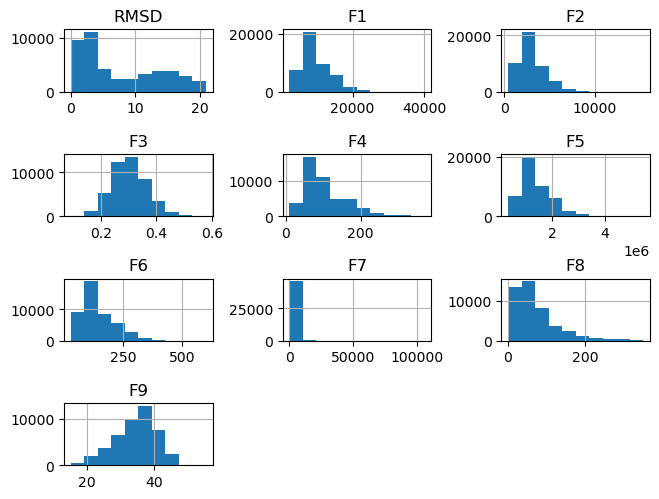

In [569]:
viz = cdf[['RMSD','F1','F2','F3','F4','F5','F6','F7','F8','F9']]
viz.hist()
plt.tight_layout(pad=0.005, h_pad=0.005, w_pad=0.005)
plt.show()

Now, let's plot each of these features against the RMSD, to see how linear their relationship is:

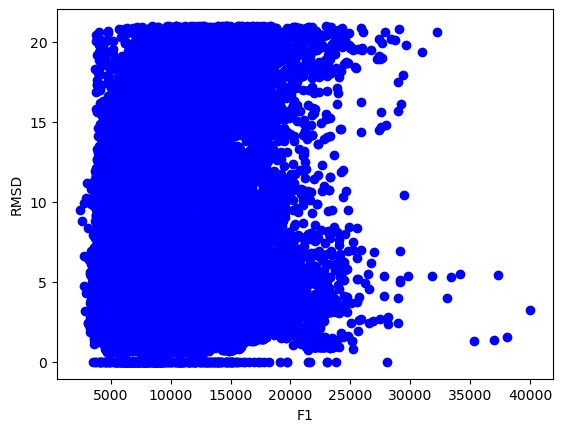

In [570]:
plt.scatter(cdf.F1, cdf.RMSD,  color='blue')
plt.xlabel("F1")
plt.ylabel("RMSD")
plt.show()

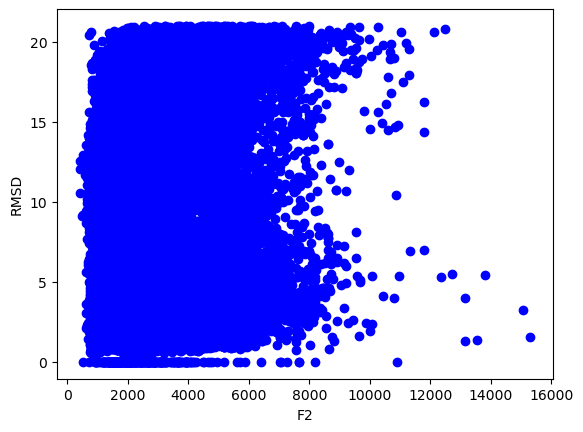

In [571]:
plt.scatter(cdf.F2, cdf.RMSD,  color='blue')
plt.xlabel("F2")
plt.ylabel("RMSD")
plt.show()

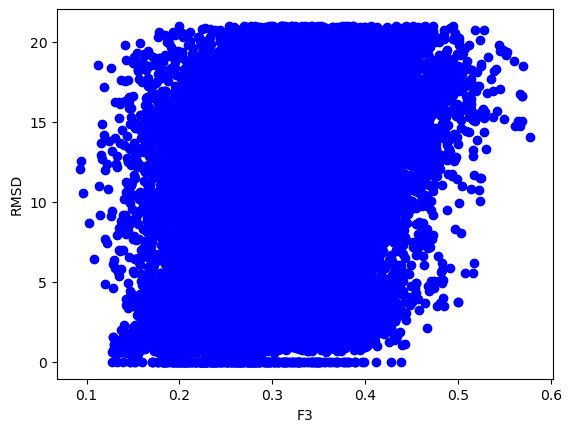

In [572]:
plt.scatter(cdf.F3, cdf.RMSD,  color='blue')
plt.xlabel("F3")
plt.ylabel("RMSD")
plt.show()

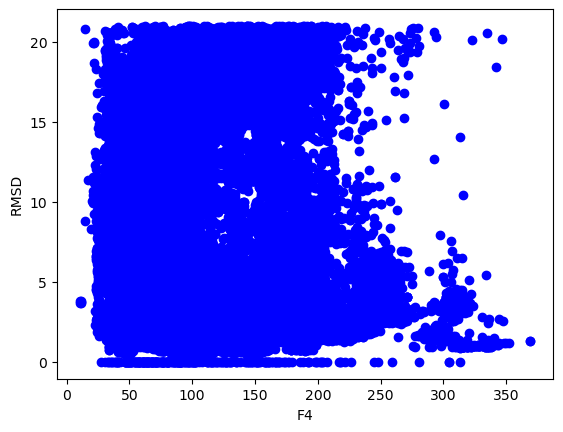

In [573]:
plt.scatter(cdf.F4, cdf.RMSD,  color='blue')
plt.xlabel("F4")
plt.ylabel("RMSD")
plt.show()

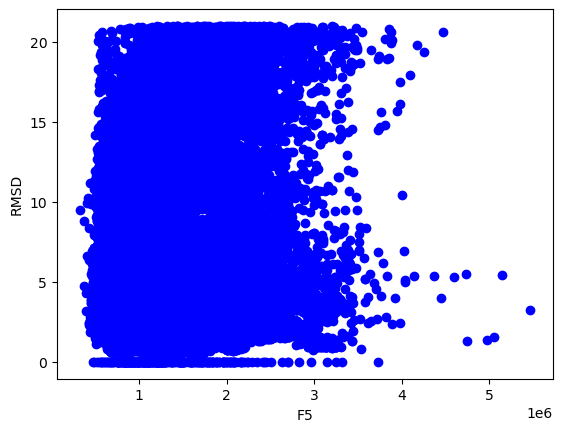

In [574]:
plt.scatter(cdf.F5, cdf.RMSD,  color='blue')
plt.xlabel("F5")
plt.ylabel("RMSD")
plt.show()

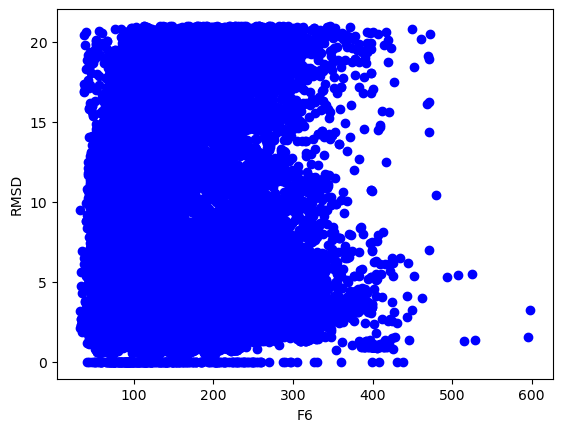

In [575]:
plt.scatter(cdf.F6, cdf.RMSD,  color='blue')
plt.xlabel("F6")
plt.ylabel("RMSD")
plt.show()

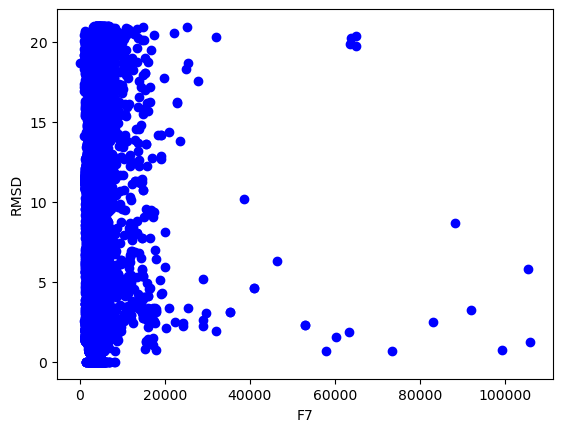

In [576]:
plt.scatter(cdf.F7 ,cdf.RMSD,  color='blue')
plt.xlabel("F7")
plt.ylabel("RMSD")
plt.show()

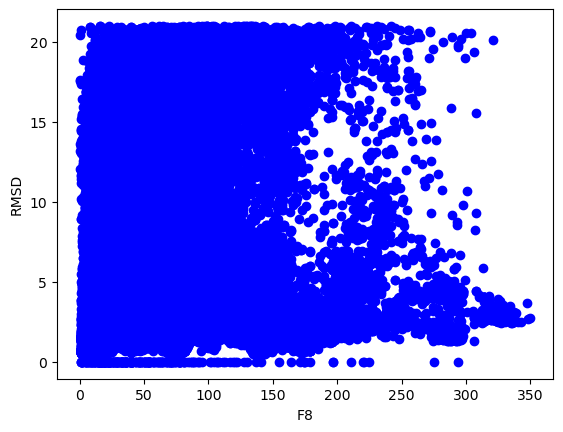

In [577]:
plt.scatter(cdf.F8, cdf.RMSD,  color='blue')
plt.xlabel("F8")
plt.ylabel("RMSD")
plt.show()

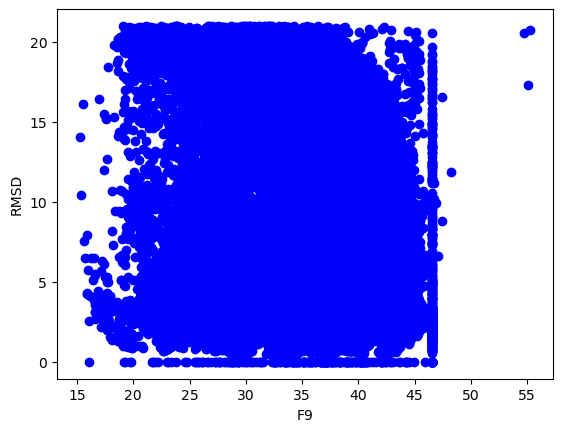

In [578]:
plt.scatter(cdf.F9, cdf.RMSD,  color='blue')
plt.xlabel("F9")
plt.ylabel("RMSD")
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, we train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:

In [579]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

#### Train data distribution

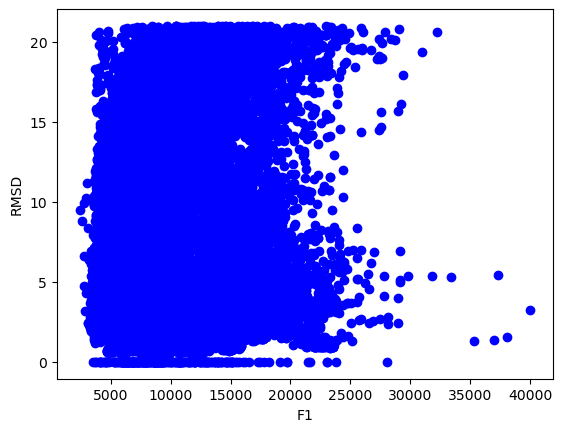

In [580]:
plt.scatter(train.F1, train.RMSD,  color='blue')
plt.xlabel("F1")
plt.ylabel("RMSD")
plt.show()

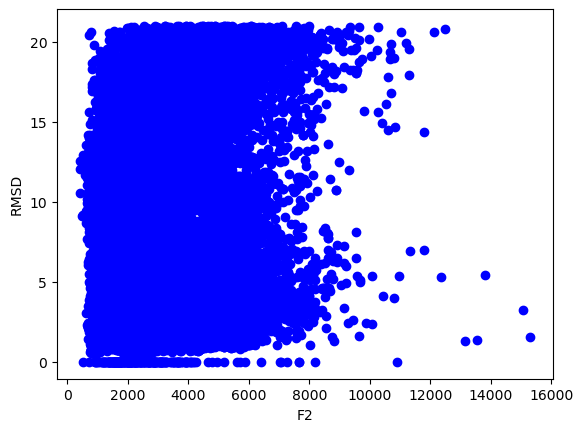

In [581]:
plt.scatter(train.F2, train.RMSD,  color='blue')
plt.xlabel("F2")
plt.ylabel("RMSD")
plt.show()

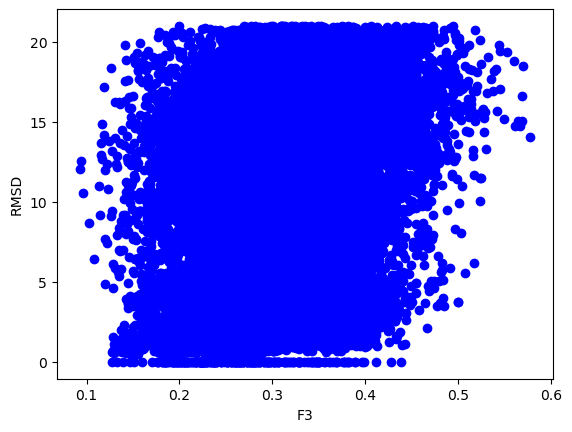

In [582]:
plt.scatter(train.F3, train.RMSD,  color='blue')
plt.xlabel("F3")
plt.ylabel("RMSD")
plt.show()

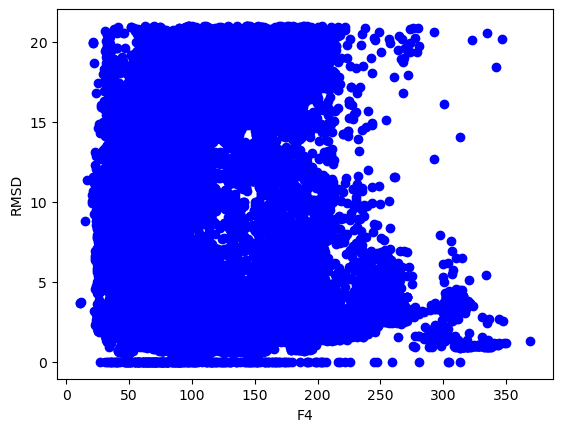

In [583]:
plt.scatter(train.F4, train.RMSD,  color='blue')
plt.xlabel("F4")
plt.ylabel("RMSD")
plt.show()

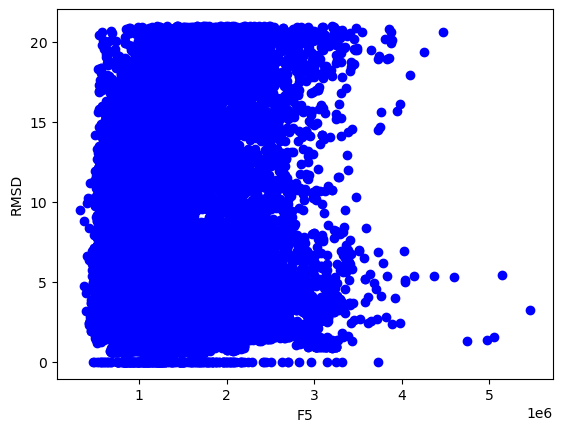

In [584]:
plt.scatter(train.F5, train.RMSD,  color='blue')
plt.xlabel("F5")
plt.ylabel("RMSD")
plt.show()

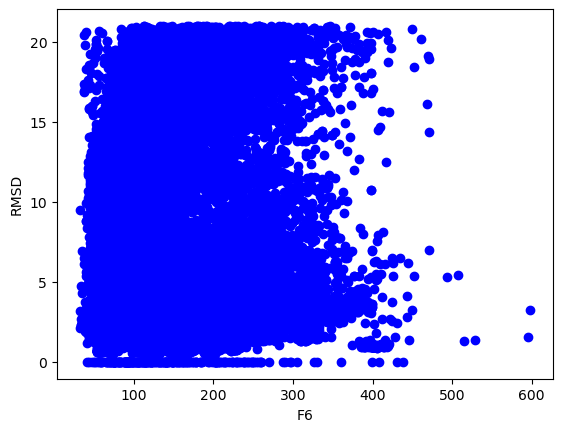

In [585]:
plt.scatter(train.F6, train.RMSD,  color='blue')
plt.xlabel("F6")
plt.ylabel("RMSD")
plt.show()

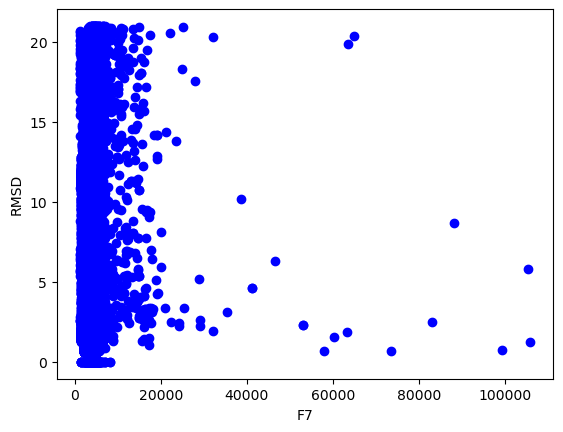

In [586]:
plt.scatter(train.F7, train.RMSD,  color='blue')
plt.xlabel("F7")
plt.ylabel("RMSD")
plt.show()

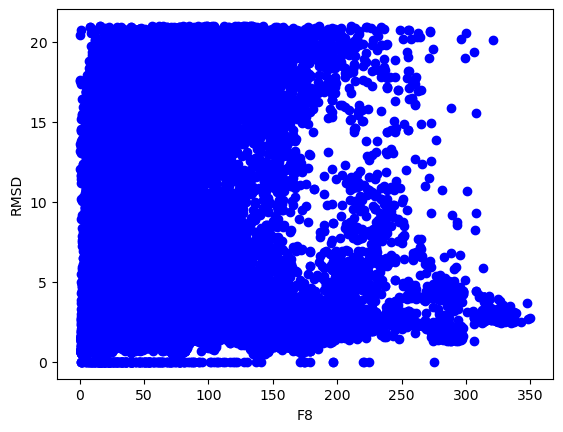

In [587]:
plt.scatter(train.F8, train.RMSD,  color='blue')
plt.xlabel("F8")
plt.ylabel("RMSD")
plt.show()

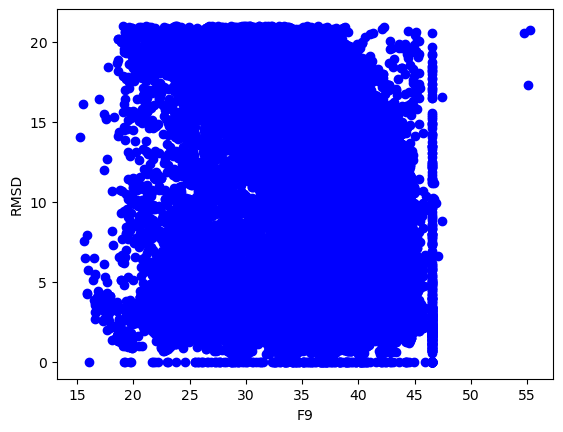

In [588]:
plt.scatter(train.F9, train.RMSD,  color='blue')
plt.xlabel("F9")
plt.ylabel("RMSD")
plt.show()

#### Modeling

Using sklearn package to model data.

In [589]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['F1']])
train_y = np.asanyarray(train[['RMSD']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-2.66469135e-05]]
Intercept:  [8.01889263]


In [590]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['F2']])
train_y = np.asanyarray(train[['RMSD']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00064479]]
Intercept:  [5.80866545]


In [591]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['F3']])
train_y = np.asanyarray(train[['RMSD']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[36.38539901]]
Intercept:  [-3.24366775]


In [592]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['F4']])
train_y = np.asanyarray(train[['RMSD']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.01884519]]
Intercept:  [9.7077352]


In [593]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['F5']])
train_y = np.asanyarray(train[['RMSD']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-1.78629064e-07]]
Intercept:  [8.0002564]


In [594]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['F6']])
train_y = np.asanyarray(train[['RMSD']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.00339113]]
Intercept:  [8.25000447]


In [595]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['F7']])
train_y = np.asanyarray(train[['RMSD']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-2.48208622e-05]]
Intercept:  [7.85462364]


In [596]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['F8']])
train_y = np.asanyarray(train[['RMSD']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-4.33909333e-05]]
Intercept:  [7.75863848]


In [597]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['F9']])
train_y = np.asanyarray(train[['RMSD']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.06749936]]
Intercept:  [5.42591233]


**Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.

#### Plot outputs

We can plot the fit line over the data:

Text(0, 0.5, 'RMSD')

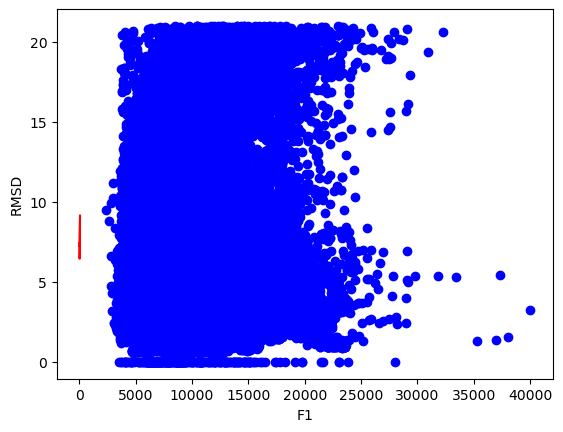

In [598]:
plt.scatter(train.F1, train.RMSD,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("F1")
plt.ylabel("RMSD")

Text(0, 0.5, 'RMSD')

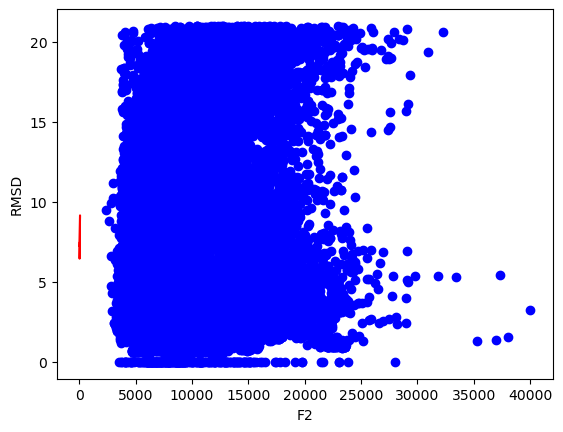

In [599]:
plt.scatter(train.F1, train.RMSD,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("F2")
plt.ylabel("RMSD")

Text(0, 0.5, 'RMSD')

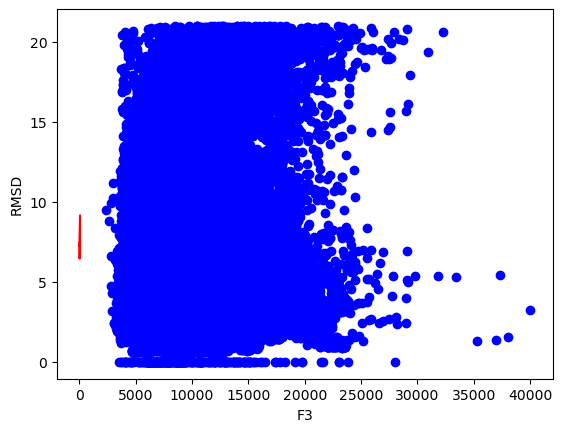

In [600]:
plt.scatter(train.F1, train.RMSD,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("F3")
plt.ylabel("RMSD")

Text(0, 0.5, 'RMSD')

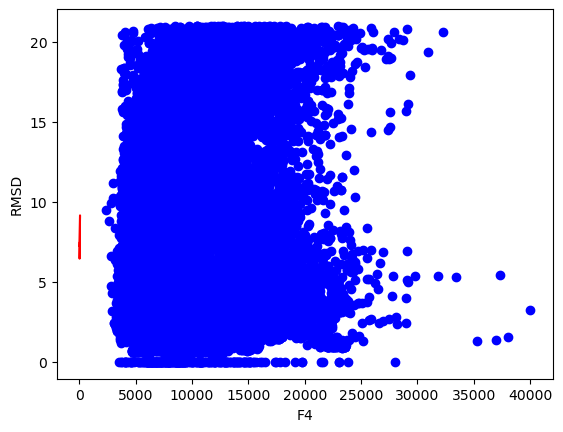

In [601]:
plt.scatter(train.F1, train.RMSD,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("F4")
plt.ylabel("RMSD")

Text(0, 0.5, 'RMSD')

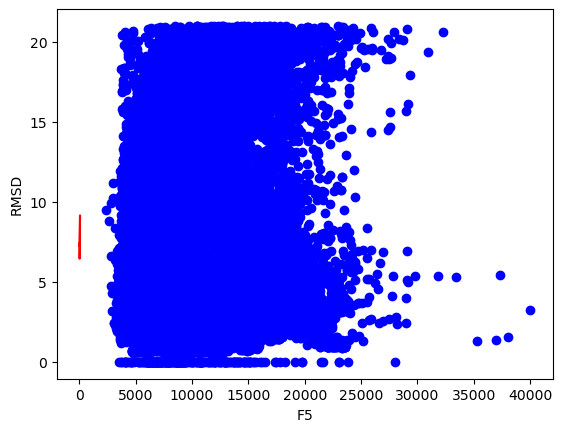

In [602]:
plt.scatter(train.F1, train.RMSD,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("F5")
plt.ylabel("RMSD")

Text(0, 0.5, 'RMSD')

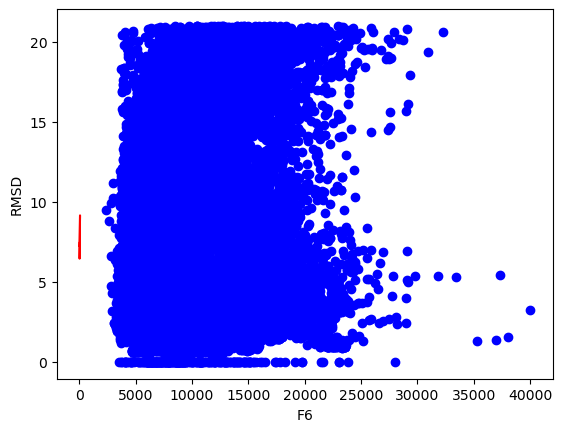

In [603]:
plt.scatter(train.F1, train.RMSD,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("F6")
plt.ylabel("RMSD")

Text(0, 0.5, 'RMSD')

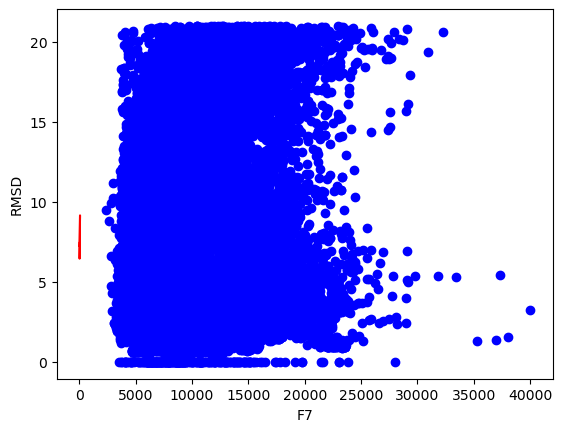

In [604]:
plt.scatter(train.F1, train.RMSD,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("F7")
plt.ylabel("RMSD")

Text(0, 0.5, 'RMSD')

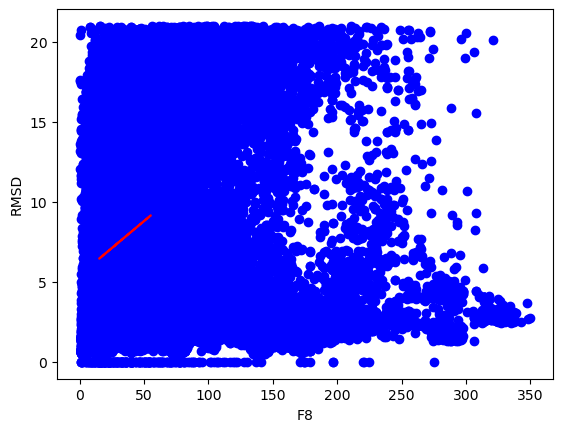

In [605]:
plt.scatter(train.F8, train.RMSD,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("F8")
plt.ylabel("RMSD")

Text(0, 0.5, 'RMSD')

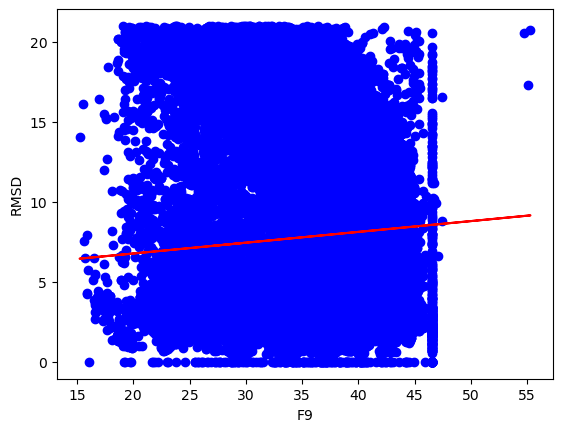

In [606]:
plt.scatter(train.F9, train.RMSD,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("F9")
plt.ylabel("RMSD")

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, let's use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [607]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['F1']])
test_y = np.asanyarray(test[['RMSD']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 661.49
Residual sum of squares (MSE): 510258.21
R2-score: -13591.76


In [608]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['F2']])
test_y = np.asanyarray(test[['RMSD']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 200.81
Residual sum of squares (MSE): 49648.96
R2-score: -1321.60


In [609]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['F3']])
test_y = np.asanyarray(test[['RMSD']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 5.25
Residual sum of squares (MSE): 42.69
R2-score: -0.14


In [610]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['F4']])
test_y = np.asanyarray(test[['RMSD']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 7.59
Residual sum of squares (MSE): 80.16
R2-score: -1.14


In [611]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['F5']])
test_y = np.asanyarray(test[['RMSD']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 91987.85
Residual sum of squares (MSE): 9863553244.90
R2-score: -262754943.54


In [612]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['F6']])
test_y = np.asanyarray(test[['RMSD']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 8.69
Residual sum of squares (MSE): 116.82
R2-score: -2.11


In [613]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['F7']])
test_y = np.asanyarray(test[['RMSD']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 267.04
Residual sum of squares (MSE): 88337.62
R2-score: -2352.22


In [614]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['F8']])
test_y = np.asanyarray(test[['RMSD']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 6.39
Residual sum of squares (MSE): 57.56
R2-score: -0.53


In [615]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['F9']])
test_y = np.asanyarray(test[['RMSD']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 5.46
Residual sum of squares (MSE): 37.46
R2-score: 0.00


## Conclusion

*   From the model's prediction we can conclude that:
The strength of a scatter plot is usually described as weak, moderate or strong. The more spread out the points are, the weaker the relationship. In all attributes cases we can observe that the data is strongly spread out in the scatter plots. The linear relationship between the atributes and the RMSD is weak.
*   The R² can be negative, which means that our model is a poor fit for our data. This is the case for F1, F2, F3, F4, F5, F6, F7 and F8.
*   A coefficient of determination (R²) of 0 indicates no relationship between the variables (random scatter of the points). This is the for F9.
*   An MSE which is very high means that the prediction of the models is very bad and very far from the actual values. This is the case for all attributes. The minimal MSE was obsereved for F3, this means that this attribute has the model for prediction among all others.
*    Another approach is training our model using a linear multivariate regression.

## Citations

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.